In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import osmnx as ox

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv("Data.csv")
ncap_fund = pd.read_csv("NCAP_Funding.csv")
state_data = pd.read_csv("State_data.csv")

In [3]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [4]:
def Season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Summer"
    elif month in [6, 7, 8, 9]:
        return "Monsoon"
    else:
        return "No need"

def days(day):
    if day in range(0,5):
        return "weekday"
    else:
        return "weekend"

data["season"] = data["Timestamp"].dt.month.apply(Season)
data["day"] = data["Timestamp"].dt.weekday.apply(days)

***Spatial aggregation. [4 Marks]***
1. Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?
2. Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?
3. Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)
4. Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?

In [5]:
# Q1

highest_avg_pm25_state = data.groupby("state")["PM2.5"].mean().idxmax()
print(f"The state having the highest average PM2.5 concentration across all stations and across all years is\n{highest_avg_pm25_state}")

The state having the highest average PM2.5 concentration across all stations and across all years is
Delhi


In [6]:
# Q2

state_pm25_above_300 = data[(data["Timestamp"].dt.year == 2023) & (data["PM2.5"] > 300)].groupby("state")["Timestamp"].nunique().idxmax()
print(f"The state which had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023 is\n{state_pm25_above_300}")

The state which had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023 is
Delhi


In [46]:
# Q3

df_2023 = data[data["Timestamp"].dt.year == 2023]

state_variability = df_2023.groupby("state")["PM2.5"].std()

most_variable_state = state_variability.idxmax()
highest_variability = state_variability.max()

print(f"The state with the highest variability in PM2.5 levels in 2023 is {most_variable_state} with a standard deviation of {highest_variability:.2f}")

print("I considered variability as dependent on standard deviation.")

The state with the highest variability in PM2.5 levels in 2023 is Delhi with a standard deviation of 82.80
I considered variability as dependent on standard deviation.


In [8]:
# Q4

low_avg_pm25_20_21 = data[(data["Timestamp"].dt.year == 2020) | (data["Timestamp"].dt.year == 2021)].groupby("state")["PM2.5"].mean().idxmin()
print(f"The state having the lowest average PM2.5 levels during the Covid period is\n{low_avg_pm25_20_21}")

The state having the lowest average PM2.5 levels during the Covid period is
Mizoram


***Temporal Aggregation [3 Marks]***
1. Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.
2. For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.
    * [Thought Question] Can you suggest some potential factors on why certain seasons are generally more polluted than others?
3. Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends Steps:
    * a. Calculate the monthly average PM2.5 for weekdays and weekends separately
    * b. X-axis: Months (January to December).
    * c. Y-axis: Average PM2.5 levels.
    * d. Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends.


In [9]:
# Q1

highest_pm25_station = data.loc[data[(data['Timestamp'].dt.year == 2020) & (data['Timestamp'].dt.month == 8)]["PM2.5"].idxmax(), "station"]
print(f"The station that recorded the highest value of PM 2.5 for the month Aug of 2020 is\n{highest_pm25_station}")


The station that recorded the highest value of PM 2.5 for the month Aug of 2020 is
Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB


In [47]:
# Q2

data18 = data[data["Timestamp"].dt.year == 2018].query('station == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"')
seasondata = data18[data18["season"] != "No need"]
max_avg_season = seasondata.groupby("season")["PM2.5"].mean().idxmax()
print(seasondata.groupby("season")["PM2.5"].mean())
print(f"The season with the highest pollution is\n{max_avg_season}")

print("Certain seasons are more polluted due to following:\nWinter air is more polluted because temperature inversion traps pollutants close to the ground. This reduces air circulation.")

season
Monsoon    34.425196
Summer           NaN
Winter     67.492344
Name: PM2.5, dtype: float64
The season with the highest pollution is
Winter
Certain seasons are more polluted due to following:
Winter air is more polluted because temperature inversion traps pollutants close to the ground. This reduces air circulation.


Average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021 are
day
weekday    42.789802
weekend    41.134580
Name: PM2.5, dtype: float64
Here, we can say that on weedays average pollution is greater than weekends.


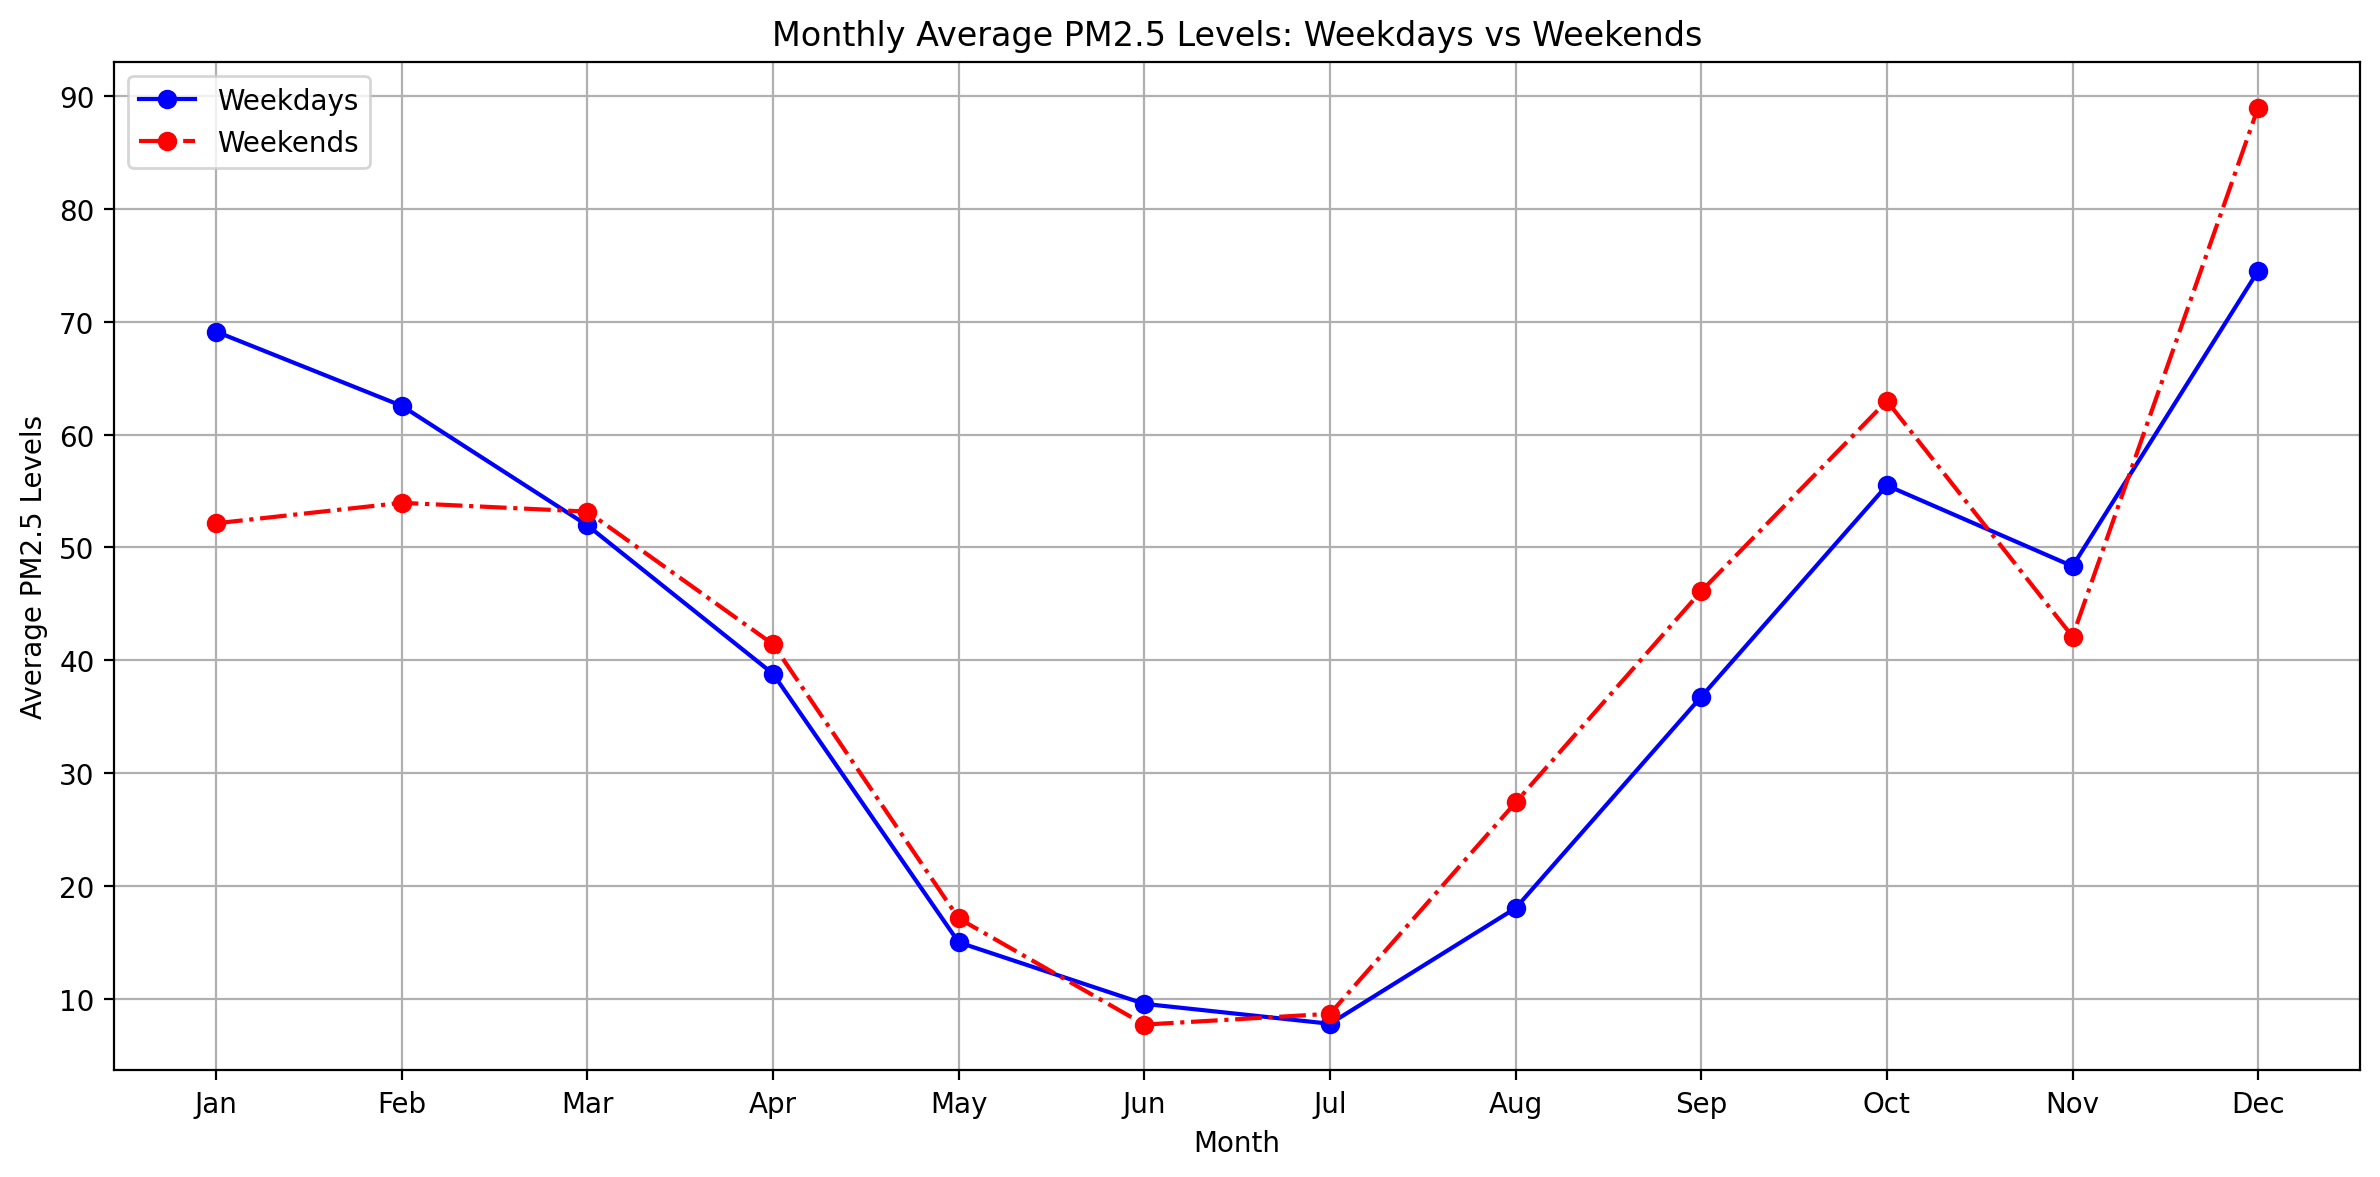

In [11]:
# Q3

data21 = data[data["Timestamp"].dt.year == 2021].query('station == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"')
avg_pm25 = data21.groupby("day")["PM2.5"].mean()
print(f"Average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021 are\n{avg_pm25}\nHere, we can say that on weedays average pollution is greater than weekends.")

monthwise = data21.groupby([data21["Timestamp"].dt.month, data21["day"]])["PM2.5"].mean().reset_index()
monthwise.columns = ["Month", "Day Type", "Average PM2.5"]

monthwise["Average PM2.5"] = monthwise["Average PM2.5"].interpolate(method="linear")

plt.figure(figsize=(12, 6))
plt.plot(monthwise[monthwise["Day Type"] == "weekday"]["Month"], monthwise[monthwise["Day Type"] == "weekday"]["Average PM2.5"], label="Weekdays", marker='o', color='blue', linestyle='-')
plt.plot(monthwise[monthwise["Day Type"] == "weekend"]["Month"], monthwise[monthwise["Day Type"] == "weekend"]["Average PM2.5"], label="Weekends", marker='o', color='red', linestyle='-.')
plt.title("Monthly Average PM2.5 Levels: Weekdays vs Weekends")
plt.xlabel("Month")
plt.ylabel("Average PM2.5 Levels")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid()
plt.tight_layout()


***Spatio-temporal aggregation [3 marks]***
1. For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?
2. Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?
3. Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2015 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)


In [12]:
# Q1

summer_avg = data[(data["season"] == "Summer") & (data["Timestamp"].dt.year == 2022)].groupby("state")["PM2.5"].mean()
monsoon_avg = data[(data["season"] == "Monsoon") & (data["Timestamp"].dt.year == 2022)].groupby("state")["PM2.5"].mean()
per_change = abs((monsoon_avg - summer_avg) / summer_avg) * 100
print(f"The percentage decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May) is\n{per_change}")

summer_avg22 = data[(data["season"] == "Summer") & (data["Timestamp"].dt.year == 2022)].groupby("state")["PM2.5"].mean()
monsoon_avg22 = data[(data["season"] == "Monsoon") & (data["Timestamp"].dt.year == 2022)].groupby("state")["PM2.5"].mean()
per_change22 = (abs((monsoon_avg22 - summer_avg22) / summer_avg22) * 100).idxmax()
print(f"The percentage decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May) is\n{per_change22}")

The percentage decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May) is
state
Andhra Pradesh       35.756894
Arunachal Pradesh    53.077110
Assam                61.176419
Bihar                53.000042
Chandigarh           45.124242
Chhattisgarh         10.975330
Delhi                55.293579
Gujarat              44.937747
Haryana              48.704688
Himachal Pradesh     37.067008
Jammu and Kashmir     0.003063
Jharkhand                  NaN
Karnataka            50.498558
Kerala               14.760499
Madhya Pradesh       56.251607
Maharashtra          52.706658
Manipur              48.441524
Meghalaya            48.546662
Mizoram              59.027533
Nagaland             56.249827
Odisha                6.712991
Puducherry           22.623792
Punjab               37.033255
Rajasthan            46.594606
Sikkim               51.805275
Tamil Nadu           17.987205
Telangana            50.160366
Tripura              56.657734



Winter has the highest levels of PM2.5 pollution because cold air traps it close to the ground and makes the air still. Monsoon season has the lowest pollution levels because rain helps wash away the dirt in the air. Summer has moderate pollution due to dust storms and factory activities.


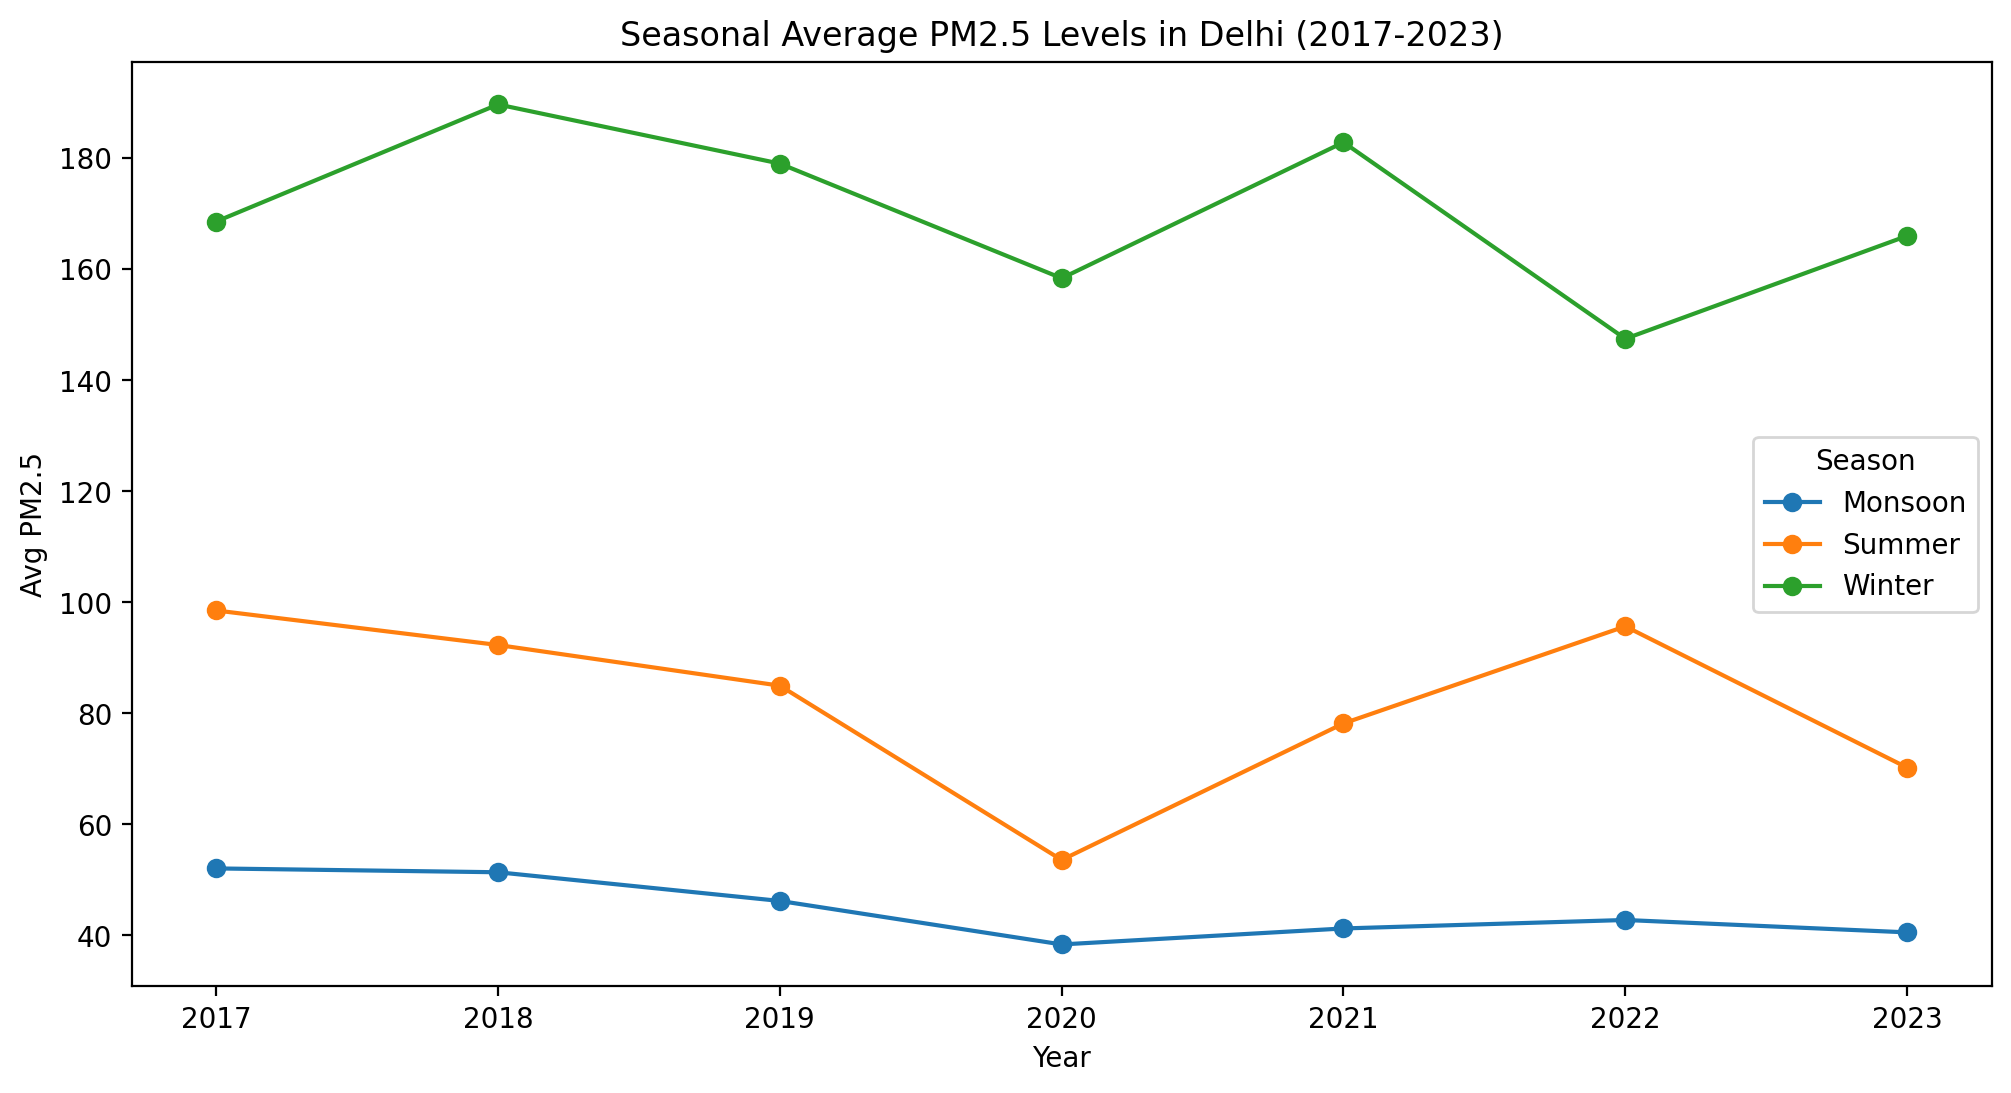

In [49]:
# Q2

avg_delhi = {}

for yr in range(2017, 2024):  
    avg_delhi[yr] = (data[(data["state"] == "Delhi") & (data["Timestamp"].dt.year == yr)].groupby("season")["PM2.5"].mean().reset_index())
combined_data = pd.concat(avg_delhi, names=["Year"]).reset_index()
combined_data = combined_data[combined_data["season"] != "No need"]
pivot_data = combined_data.pivot(index = "Year", columns = "season", values = "PM2.5")
plt.figure(figsize = (12, 6))
for season in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[season], marker='o', label=season)
plt.xlabel("Year")
plt.ylabel("Avg PM2.5")
plt.title("Seasonal Average PM2.5 Levels in Delhi (2017-2023)")
plt.legend(title = "Season")


print("\nWinter has the highest levels of PM2.5 pollution because cold air traps it close to the ground and makes the air still. Monsoon season has the lowest pollution levels because rain helps wash away the dirt in the air. Summer has moderate pollution due to dust storms and factory activities.")

Delhi city has more fluctuations


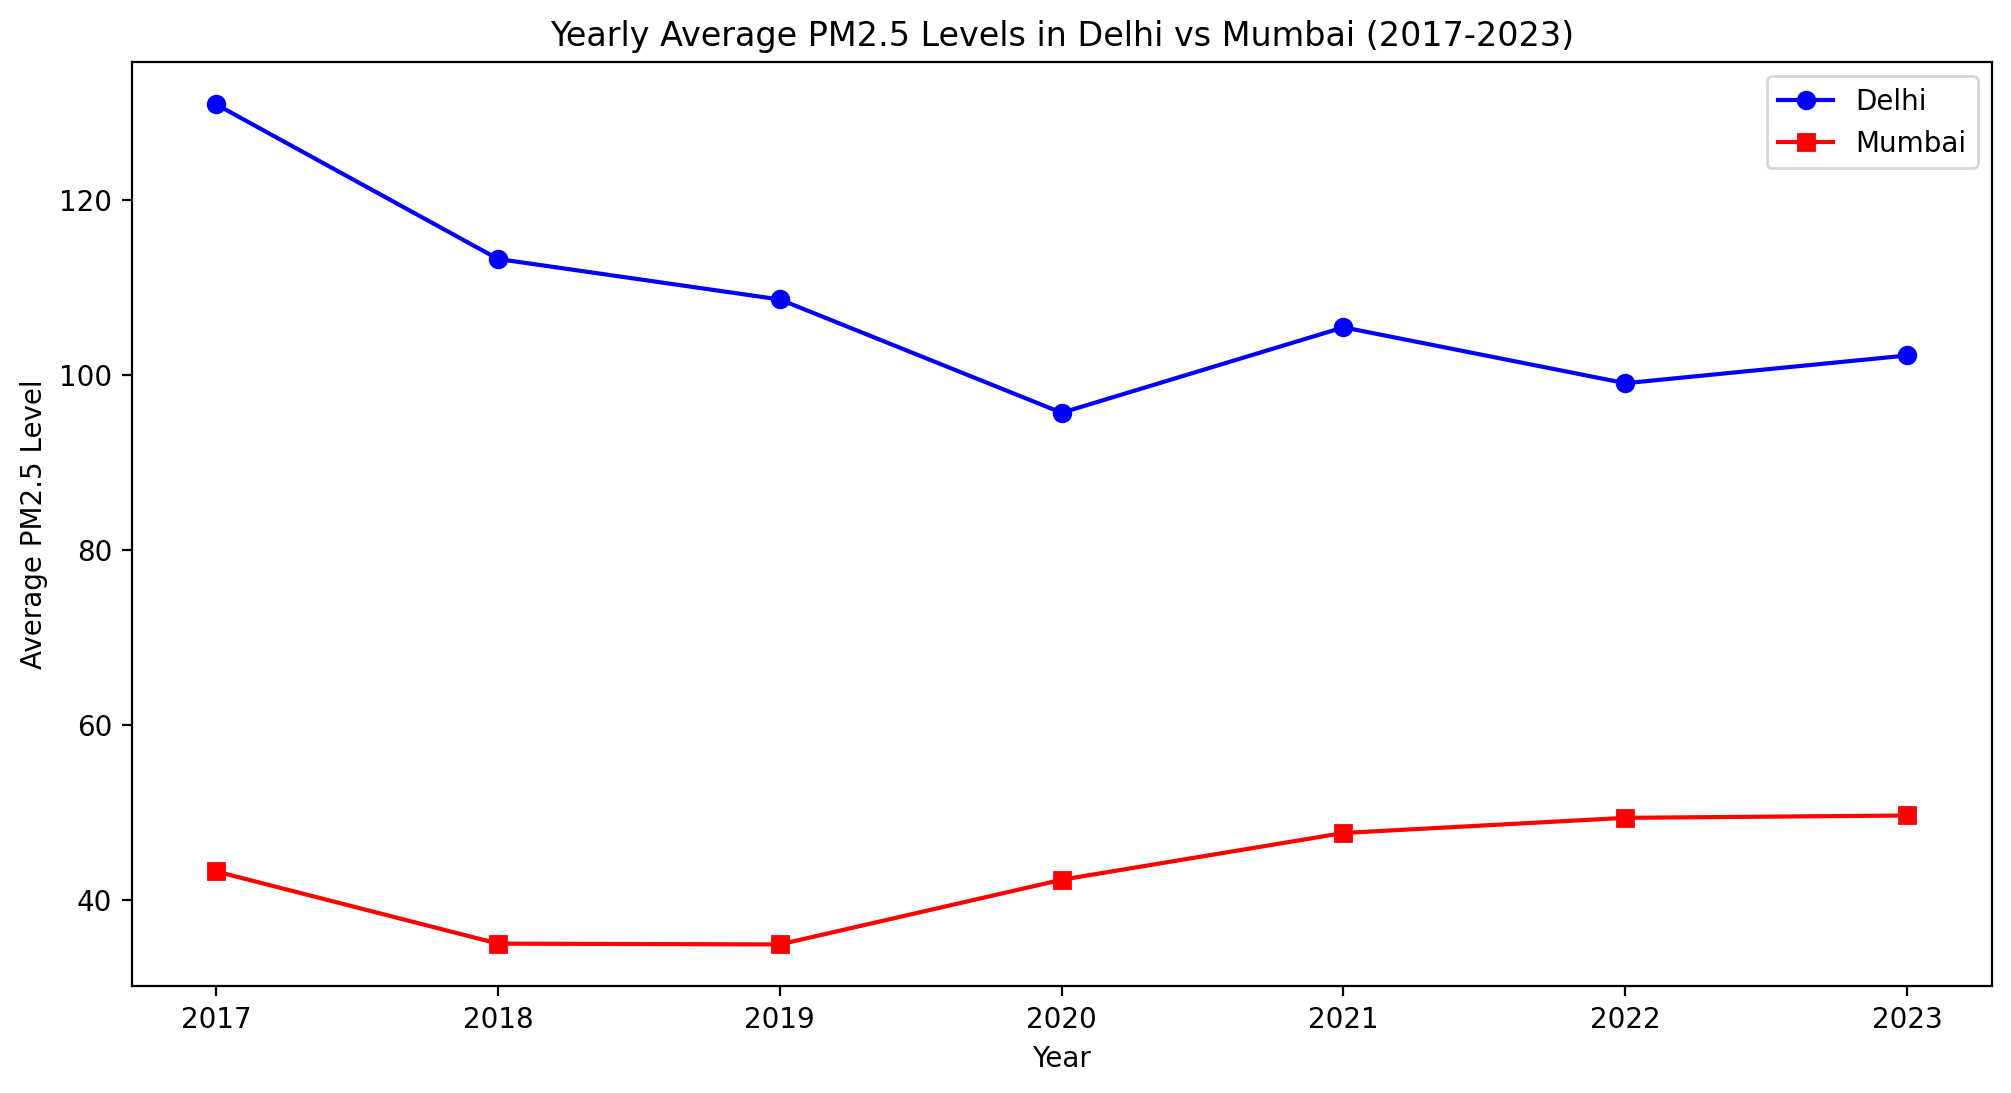

In [50]:
# Q3

mumbai = {}
delhi = {}

for yr in range(2017, 2024):  
    delhi[yr] = (data[(data["state"] == "Delhi") & (data["Timestamp"].dt.year == yr)]["PM2.5"].mean())
for yr in range(2017, 2024):  
    mumbai[yr] = (data[(data["city"] == "Mumbai") & (data["Timestamp"].dt.year == yr)]["PM2.5"].mean())

delhi = pd.DataFrame.from_dict(delhi, orient="index", columns=["PM2.5"])
mumbai = pd.DataFrame.from_dict(mumbai, orient="index", columns=["PM2.5"])


plt.figure(figsize=(12, 6))
plt.plot(delhi.index, delhi["PM2.5"], marker='o', linestyle='-', color='blue', label="Delhi")
plt.plot(mumbai.index, mumbai["PM2.5"], marker='s', linestyle='-', color='red', label="Mumbai")
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Level")
plt.title("Yearly Average PM2.5 Levels in Delhi vs Mumbai (2017-2023)")
plt.legend()

print("Delhi city has more fluctuations")

***Population-Based [3 Marks]***
1. Which state in India has the highest number of monitoring stations relative to its population? 
2. Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.
3. Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?
    * a. X-axis: Population density (people per square kilometer).
    * b. Y-axis: Average PM2.5 concentration.
    * c. Use a scatter plot to show the relationship, where each point represents a state.

In [15]:
state_data = state_data.rename(columns={"State": "state"})

In [16]:
# Q1

no_monitoring_station = data.groupby("state")["station"].nunique().reset_index()
no_monitoring_station.columns = ["state", "no of stations"]
new = no_monitoring_station.merge(state_data, on = "state")
new["rel"] = new["no of stations"] / new["Population"]
relative = new["state"].iloc[new["rel"].idxmax()]
print(f"The state in India has the highest number of monitoring stations relative to its population is\n{relative}")

The state in India has the highest number of monitoring stations relative to its population is
Chandigarh


Text(0.5, 1.0, 'Top 5 Most Polluted States by PM2.5 Exposure in 2023')

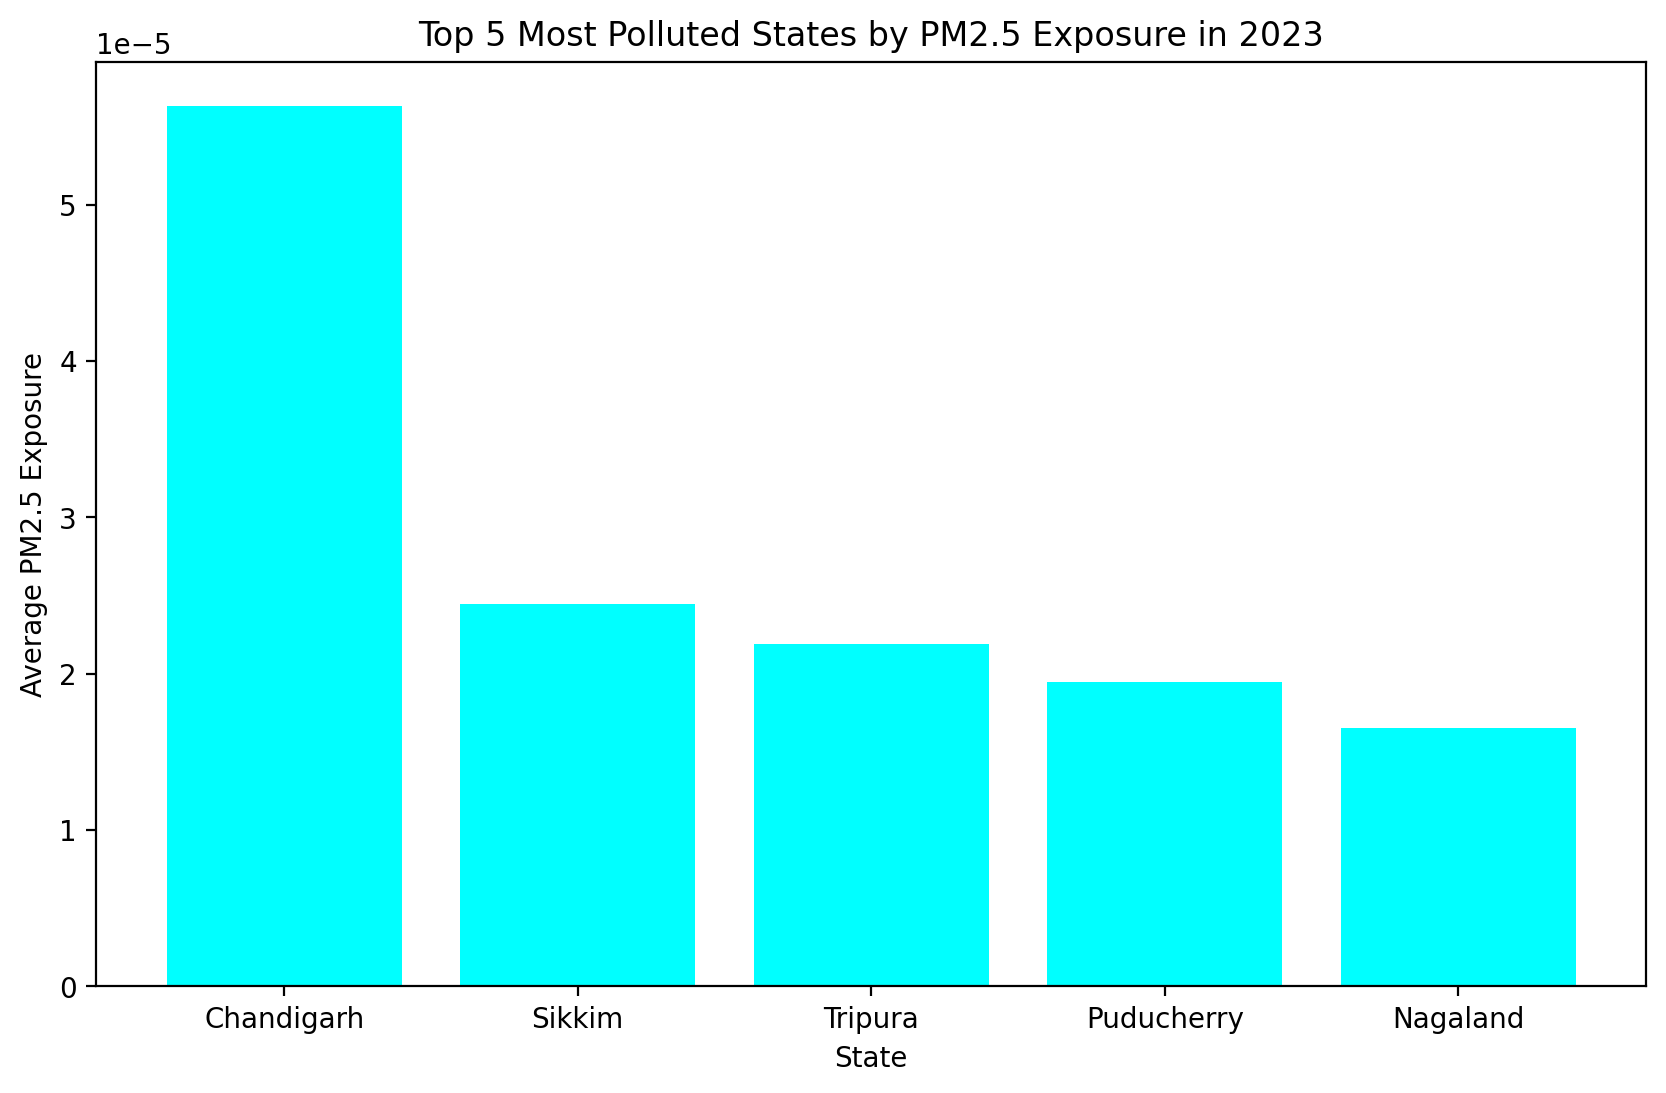

In [63]:
# Q2

top5 = data[data["Timestamp"].dt.year == 2023].groupby("state")["PM2.5"].mean().reset_index()
top_5 = state_data.merge(top5, on = "state")
top_5["rel"] = top_5["PM2.5"] / top_5["Population"]
top_5 = top_5.nlargest(5, "rel")
plt.figure(figsize=(10, 6))
plt.bar(top_5["state"], top_5["rel"], color="cyan")
plt.xlabel("State")
plt.ylabel("Average PM2.5 Exposure")
plt.title("Top 5 Most Polluted States by PM2.5 Exposure in 2023")

The scatter plot shows a weak or non-linear relationship between population density and PM2.5 concentration. Some crowded areas have high levels of pollution, but many places with low to moderate population density also have significant pollution. This means that other factors, like industrial activity, traffic emissions, geography, and weather conditions, also affect pollution levels.


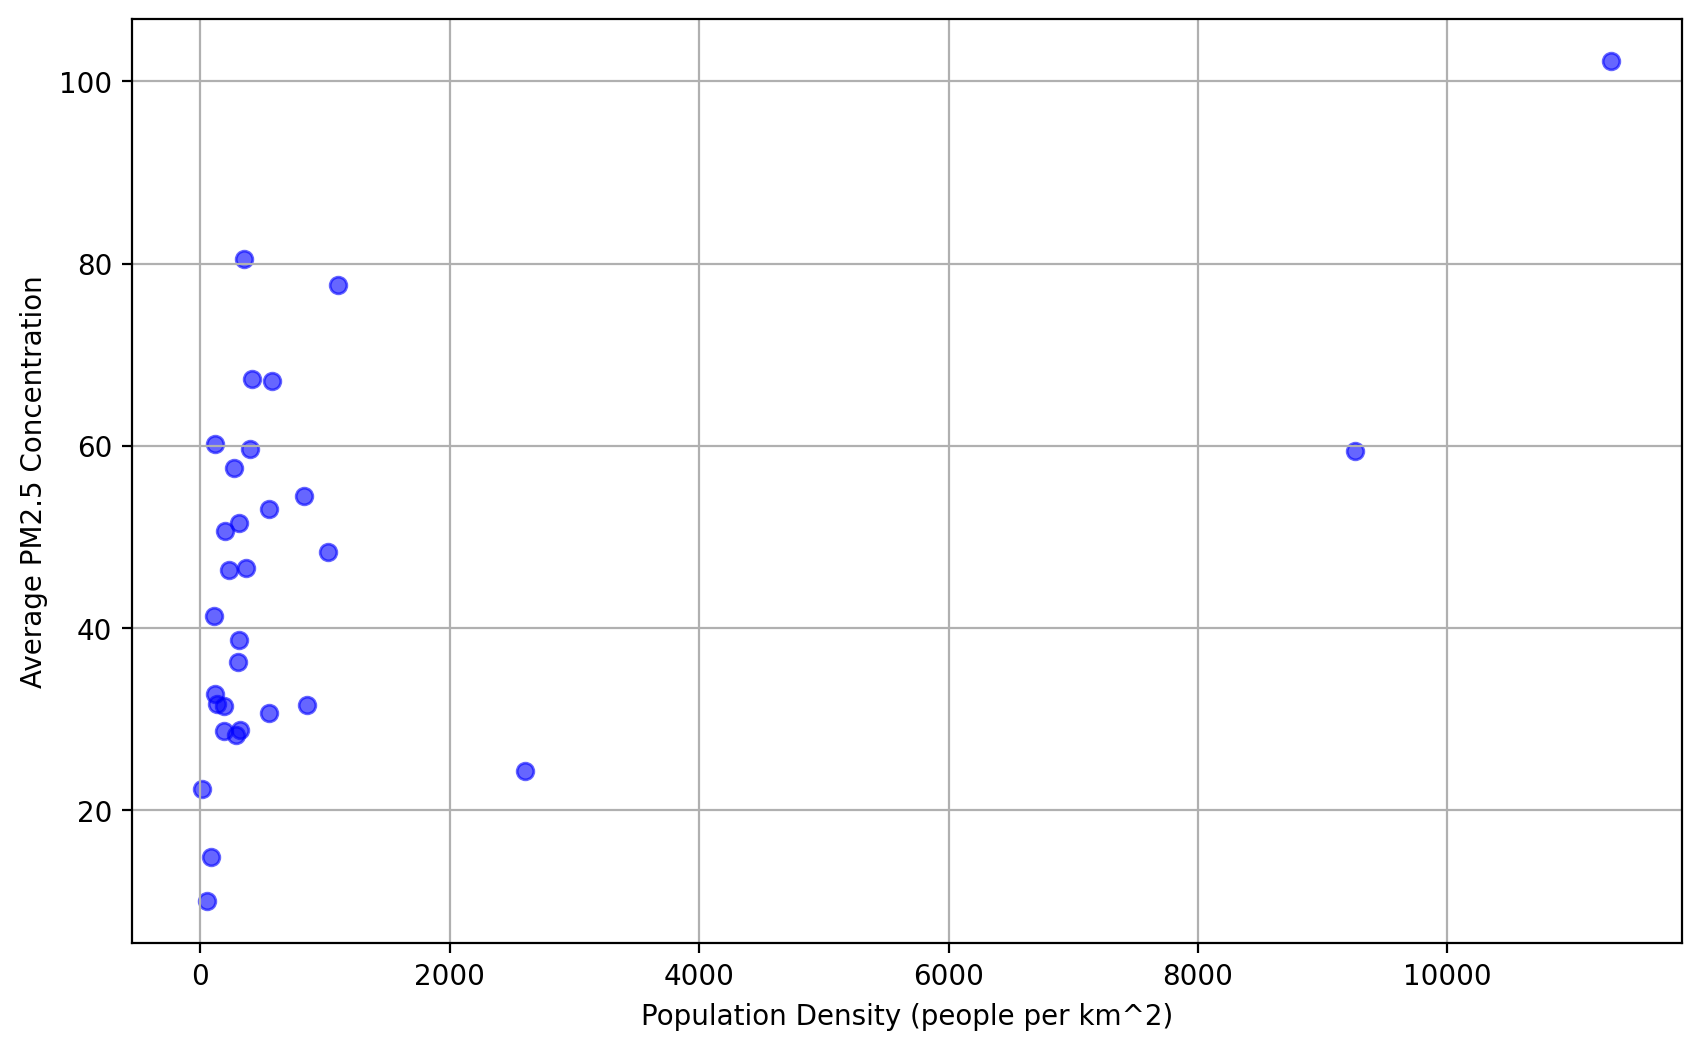

In [54]:
# Q3

pollution_2023 = data[data["Timestamp"].dt.year == 2023]

state_pm25_avg = pollution_2023.groupby("state")["PM2.5"].mean().reset_index()

state_pm25_avg = state_pm25_avg.merge(state_data, on="state")

state_pm25_avg["Population Density"] = state_pm25_avg["Population"] / state_pm25_avg["Area (km2)"]


plt.figure(figsize = (10, 6))
plt.scatter(state_pm25_avg["Population Density"], state_pm25_avg["PM2.5"], color="blue", alpha=0.6)
plt.xlabel("Population Density (people per km^2)")
plt.ylabel("Average PM2.5 Concentration")
plt.grid(True)


print("The scatter plot shows a weak or non-linear relationship between population density and PM2.5 concentration. Some crowded areas have high levels of pollution, but many places with low to moderate population density also have significant pollution. This means that other factors, like industrial activity, traffic emissions, geography, and weather conditions, also affect pollution levels.")

***Area Based [3 Marks]***
1. Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.
    * a. X-axis: States.
    * b. Y-axis: PM2.5 concentration per square kilometer.
    * c. Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.
2. Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.
3. Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.


The state having the highest PM2.5 concentration per square kilometer is
Chandigarh


Text(0.5, 1.0, 'Pollution levels for all states relative to their area')

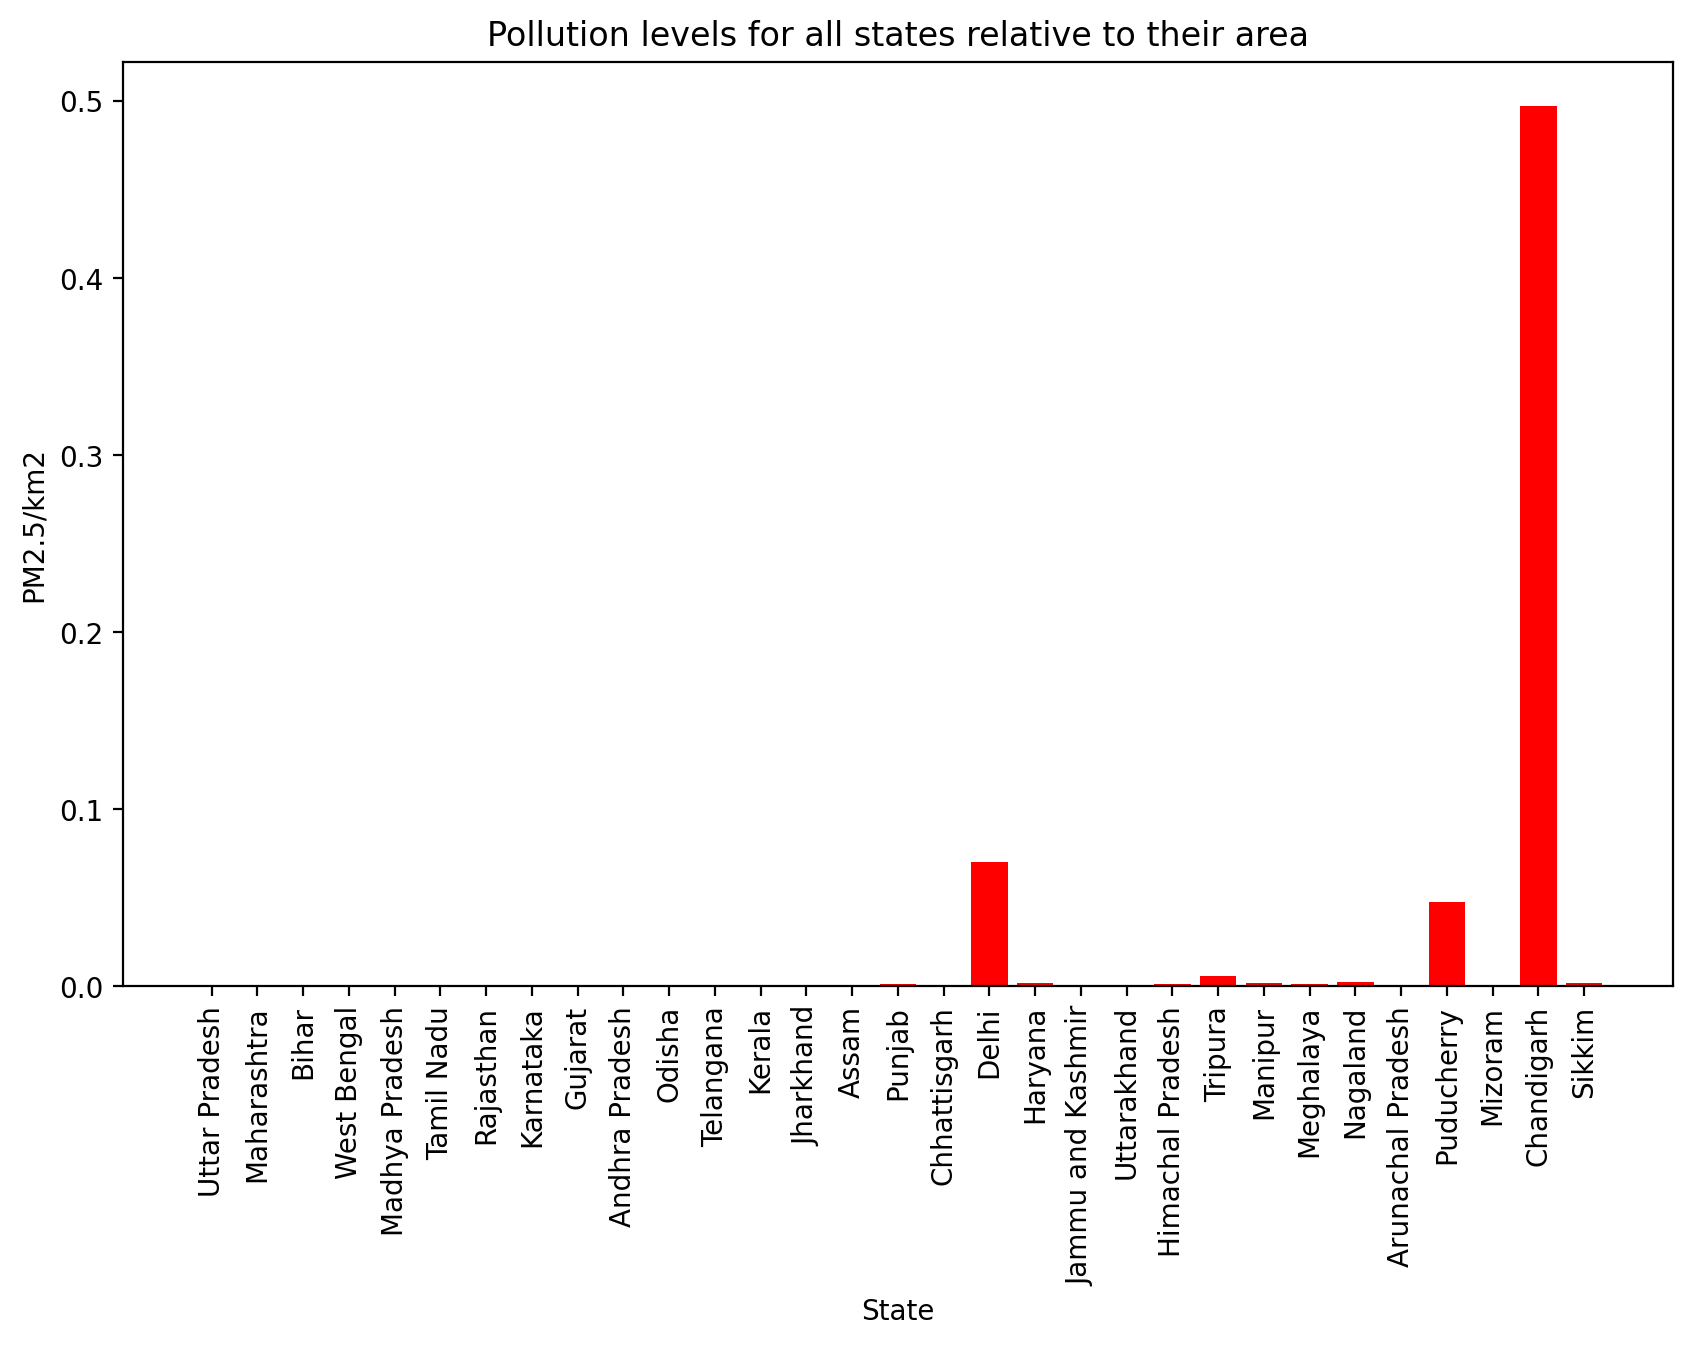

In [19]:
# Q1

new = state_data.copy()
new = new.merge(data.groupby("state")["PM2.5"].mean(), on = "state")
new["PM2.5/km2"] = new["PM2.5"] / new["Area (km2)"]
print(f"The state having the highest PM2.5 concentration per square kilometer is\n{new["state"].loc[new["PM2.5/km2"].idxmax()]}")

plt.figure(figsize=(10, 6))
plt.bar(new["state"], new["PM2.5/km2"], color="red")
plt.xlabel("State")
plt.ylabel("PM2.5/km2")
plt.xticks(rotation = 90)
plt.title("Pollution levels for all states relative to their area")

The state with the highest density of monitoring stations relative to its area is
Delhi


Text(0.5, 1.0, 'Number of monitoring stations per square kilometer')

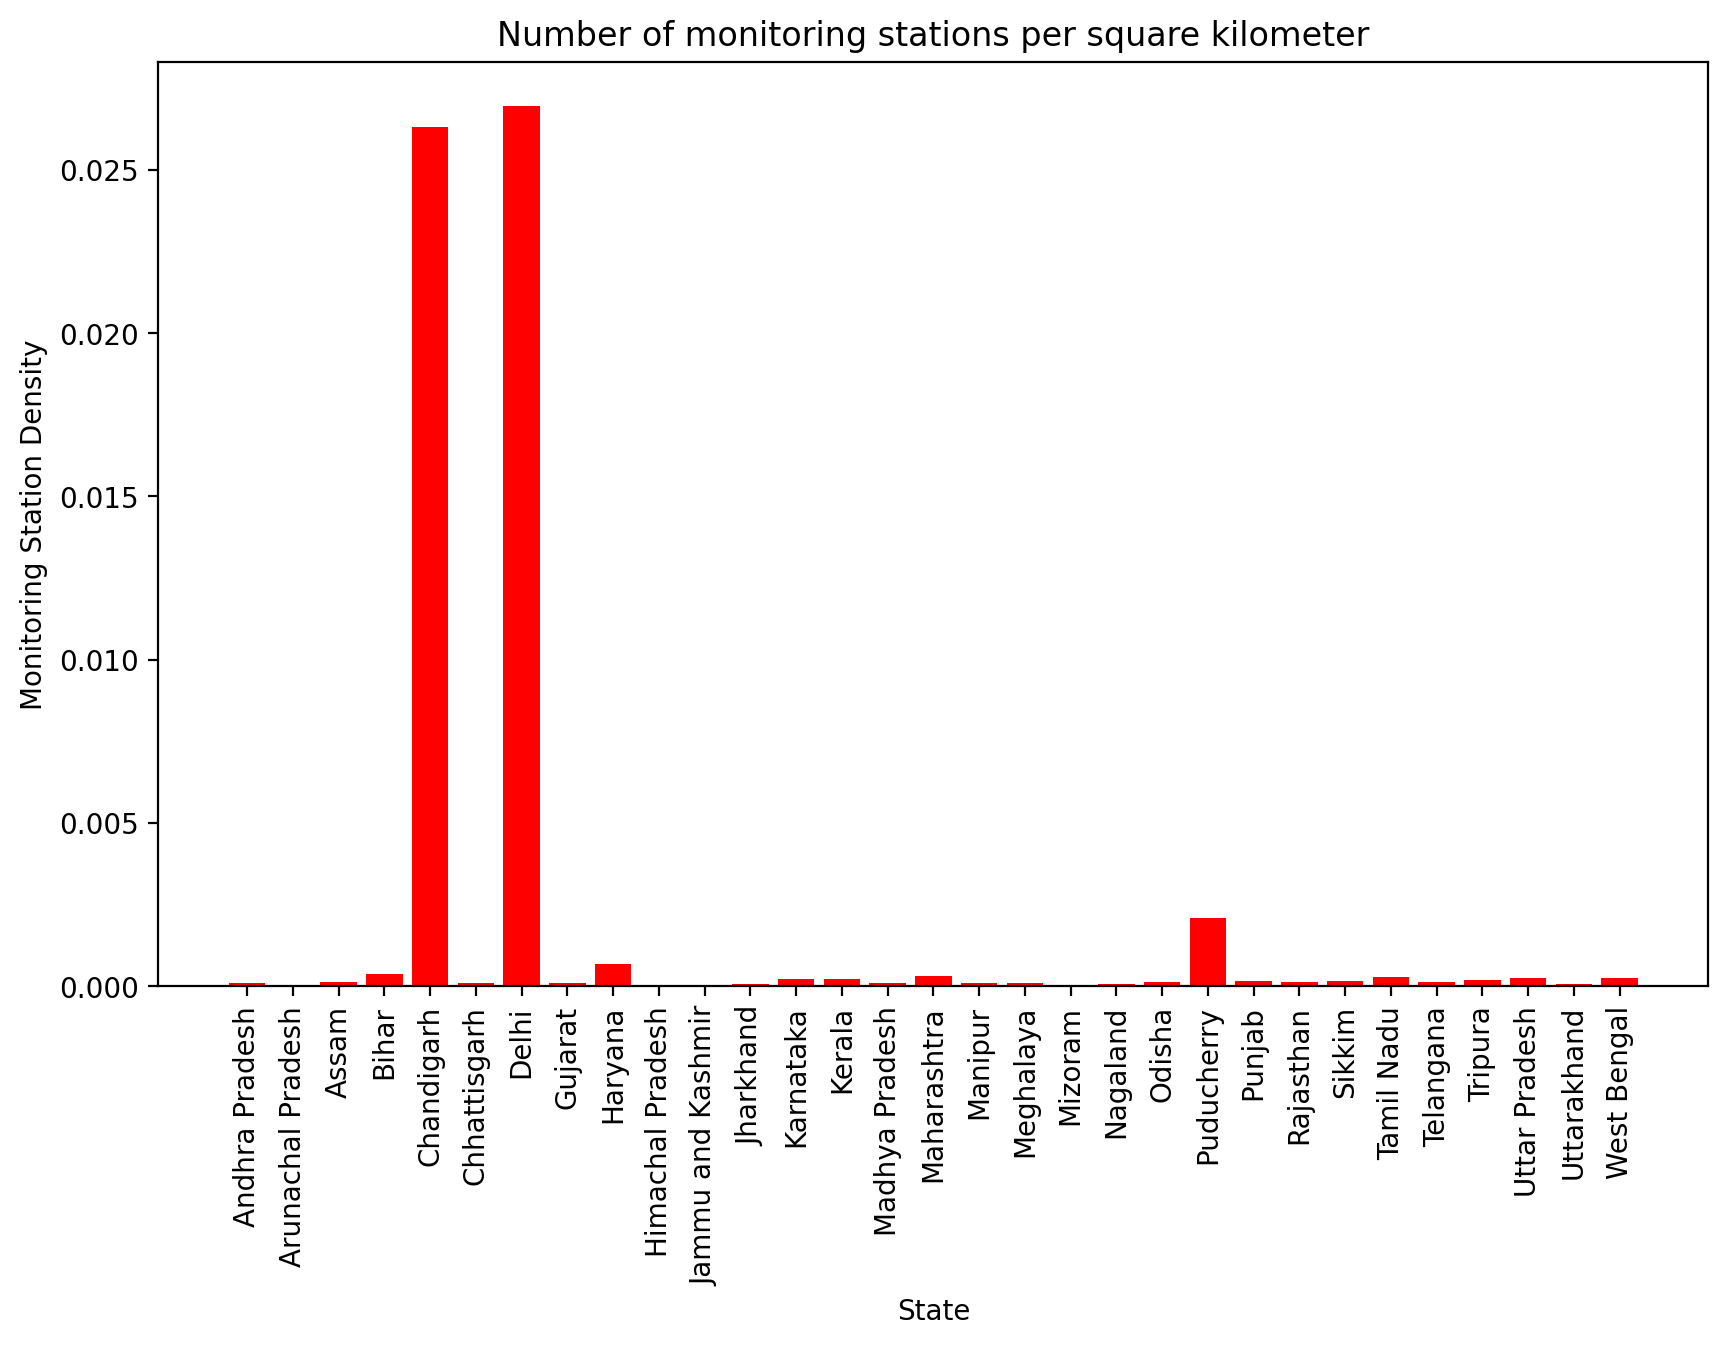

In [20]:
# Q2

no_monitoring_station = data.groupby("state")["station"].nunique().reset_index()
no_monitoring_station.columns = ["state", "no of stations"]
new = no_monitoring_station.merge(state_data, on = "state")
new["rel"] = new["no of stations"] / new["Area (km2)"]
relative = new["state"].iloc[new["rel"].idxmax()]
print(f"The state with the highest density of monitoring stations relative to its area is\n{relative}")

plt.figure(figsize=(10, 6))
plt.bar(new["state"], new["rel"], color="red")
plt.xlabel("State")
plt.ylabel("Monitoring Station Density")
plt.xticks(rotation = 90)
plt.title("Number of monitoring stations per square kilometer")

In [55]:
# Q3

new = data[((data["state"] == "Maharashtra") | (data["state"] == "Madhya Pradesh")) & (data["Timestamp"].dt.year == 2021)].groupby("state")["PM2.5"].mean().reset_index()
new.columns = ["state", "avg PM2.5"]
new = new.merge(state_data, on = "state")
new["popu den"] = new["Population"] / new["Area (km2)"]
print(f"{new["state"].loc[new["avg PM2.5"].idxmax()]} has more average PM2.5 value than {new["state"].loc[new["avg PM2.5"].idxmin()]} over year 2021.")

print("Maharashtra likely has higher PM2.5 levels than Madhya Pradesh because it has a higher population density, which leads to more vehicle and industrial emissions. However, if their pollution levels are similar, it means that factors like weather and industrial activity are more important than just population density.")

Madhya Pradesh has more average PM2.5 value than Maharashtra over year 2021.
Maharashtra likely has higher PM2.5 levels than Madhya Pradesh because it has a higher population density, which leads to more vehicle and industrial emissions. However, if their pollution levels are similar, it means that factors like weather and industrial activity are more important than just population density.


***Funding Based [3 Marks]***
1. Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.
2. Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?
3. Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.


In [22]:
ncap_fund = ncap_fund.rename(columns={"State": "state"})
ncap_fund["Amount released during FY 2020-21"] = pd.to_numeric(ncap_fund["Amount released during FY 2020-21"], errors="coerce")
ncap_fund["Amount released during FY 2021-22"] = pd.to_numeric(ncap_fund["Amount released during FY 2021-22"], errors="coerce")
ncap_fund["Amount released during FY 2019-20"] = pd.to_numeric(ncap_fund["Amount released during FY 2019-20"], errors="coerce")
ncap_fund["Total fund released"] = pd.to_numeric(ncap_fund["Total fund released"], errors="coerce")


Average PM2.5 in NCAP-funded states: 48.94
Average PM2.5 in non-funded states: 32.95


<BarContainer object of 2 artists>

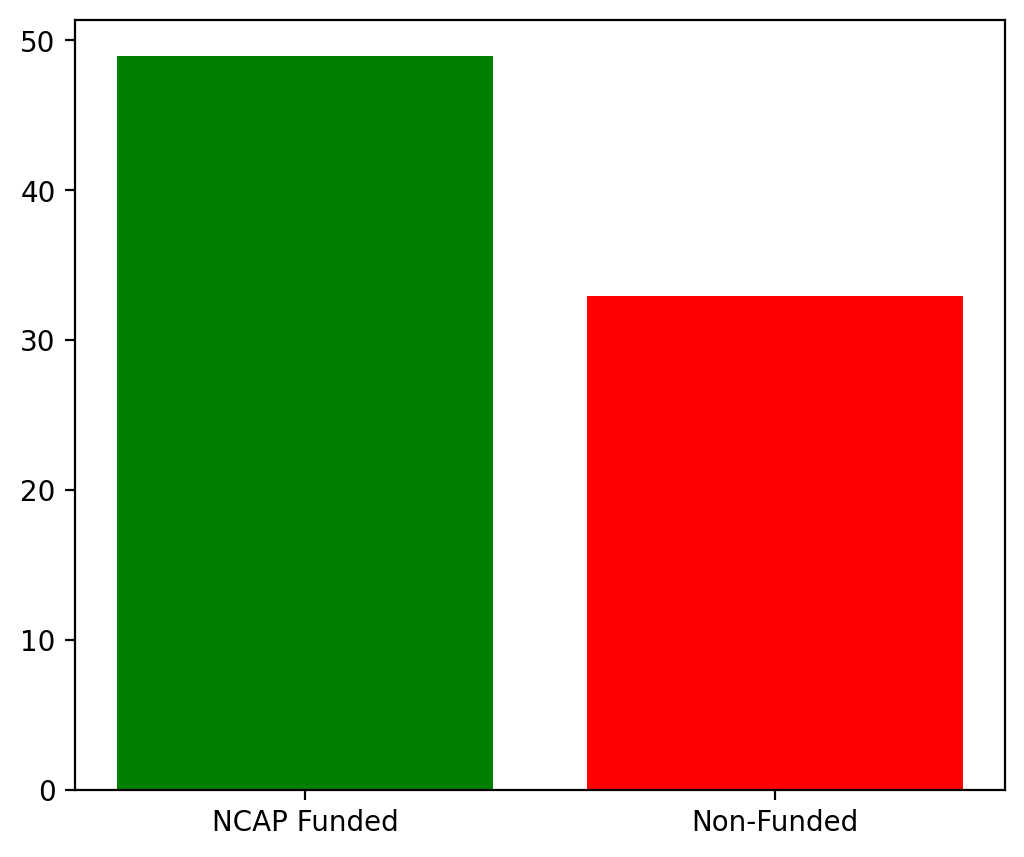

In [59]:
# Q1

pollution_2021 = data[data["Timestamp"].dt.year == 2021]

state_pm25_avg = pollution_2021.groupby("state")["PM2.5"].mean().reset_index()

state_funding = ncap_fund.groupby("state")["Total fund released"].sum().reset_index()

state_pm25_avg = state_pm25_avg.merge(state_funding, on="state", how="left")

state_pm25_avg["NCAP Funded"] = state_pm25_avg["Total fund released"].fillna(0) > 0

avg_pm25_funded = state_pm25_avg[state_pm25_avg["NCAP Funded"]]["PM2.5"].mean()
avg_pm25_non_funded = state_pm25_avg[~state_pm25_avg["NCAP Funded"]]["PM2.5"].mean()

print(f"Average PM2.5 in NCAP-funded states: {avg_pm25_funded:.2f}")
print(f"Average PM2.5 in non-funded states: {avg_pm25_non_funded:.2f}")

plt.figure(figsize=(6, 5))
plt.bar(["NCAP Funded", "Non-Funded"], [avg_pm25_funded, avg_pm25_non_funded], color=["green", "red"])

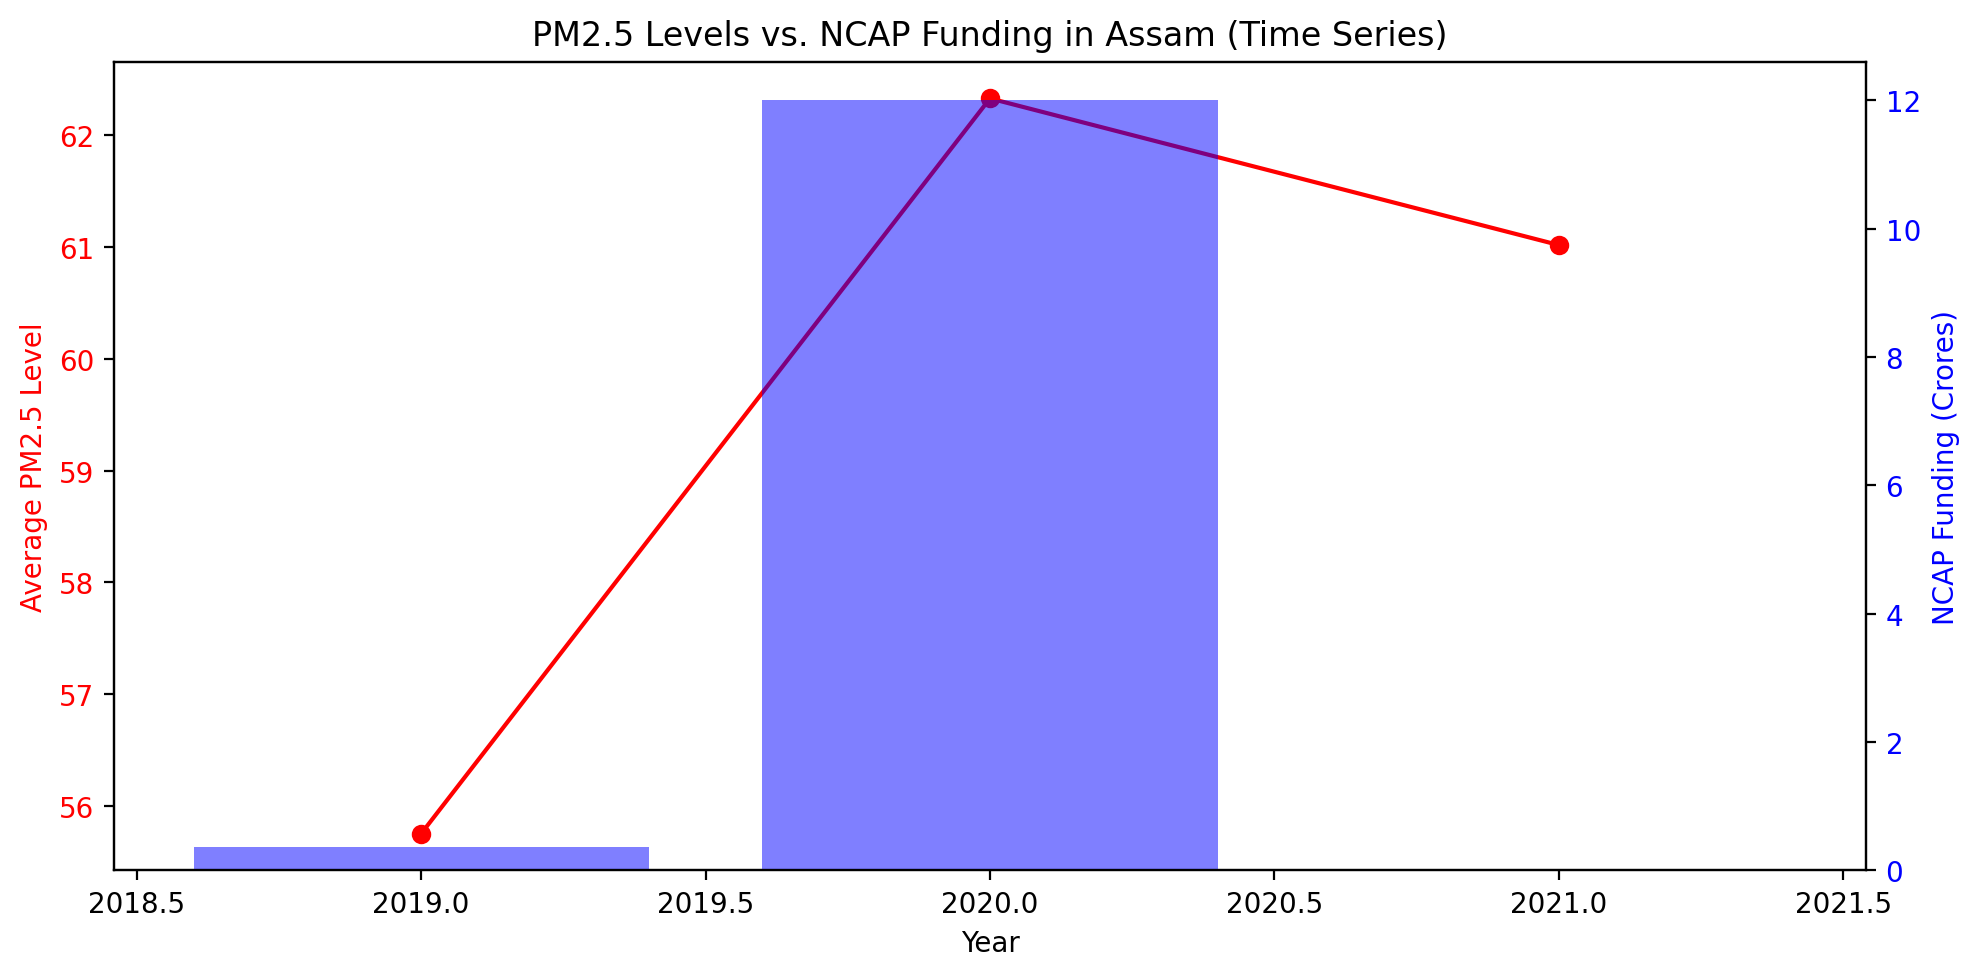

In [33]:
# Q2

assam_pm25 = data[data["state"] == "Assam"].copy()
assam_pm25["Year"] = assam_pm25["Timestamp"].dt.year 
pm25_trend = assam_pm25.groupby("Year")["PM2.5"].mean().reset_index()

assam_funding = ncap_fund[ncap_fund["state"] == "Assam"]

funding_by_year = pd.DataFrame({
    "Year": [2019, 2020, 2021],  
    "Total fund released": [
        assam_funding["Amount released during FY 2019-20"].sum(),
        assam_funding["Amount released during FY 2020-21"].sum(),
        assam_funding["Amount released during FY 2021-22"].sum()
    ]
})

assam_trend = pm25_trend.merge(funding_by_year, on="Year", how="left")
assam_trend = assam_trend[assam_trend["Year"].isin([2019, 2020, 2021])]


fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.set_xlabel("Year")
ax1.set_ylabel("Average PM2.5 Level", color="red")
ax1.plot(assam_trend["Year"], assam_trend["PM2.5"], marker="o", color="red", label="PM2.5 Level")
ax1.tick_params(axis="y", labelcolor="red")

ax2 = ax1.twinx()
ax2.set_ylabel("NCAP Funding (Crores)", color="blue")
ax2.bar(assam_trend["Year"], assam_trend["Total fund released"], alpha=0.5, color="blue", label="NCAP Funding")
ax2.tick_params(axis="y", labelcolor="blue")

plt.title("PM2.5 Levels vs. NCAP Funding in Assam (Time Series)")
fig.tight_layout()
plt.show()

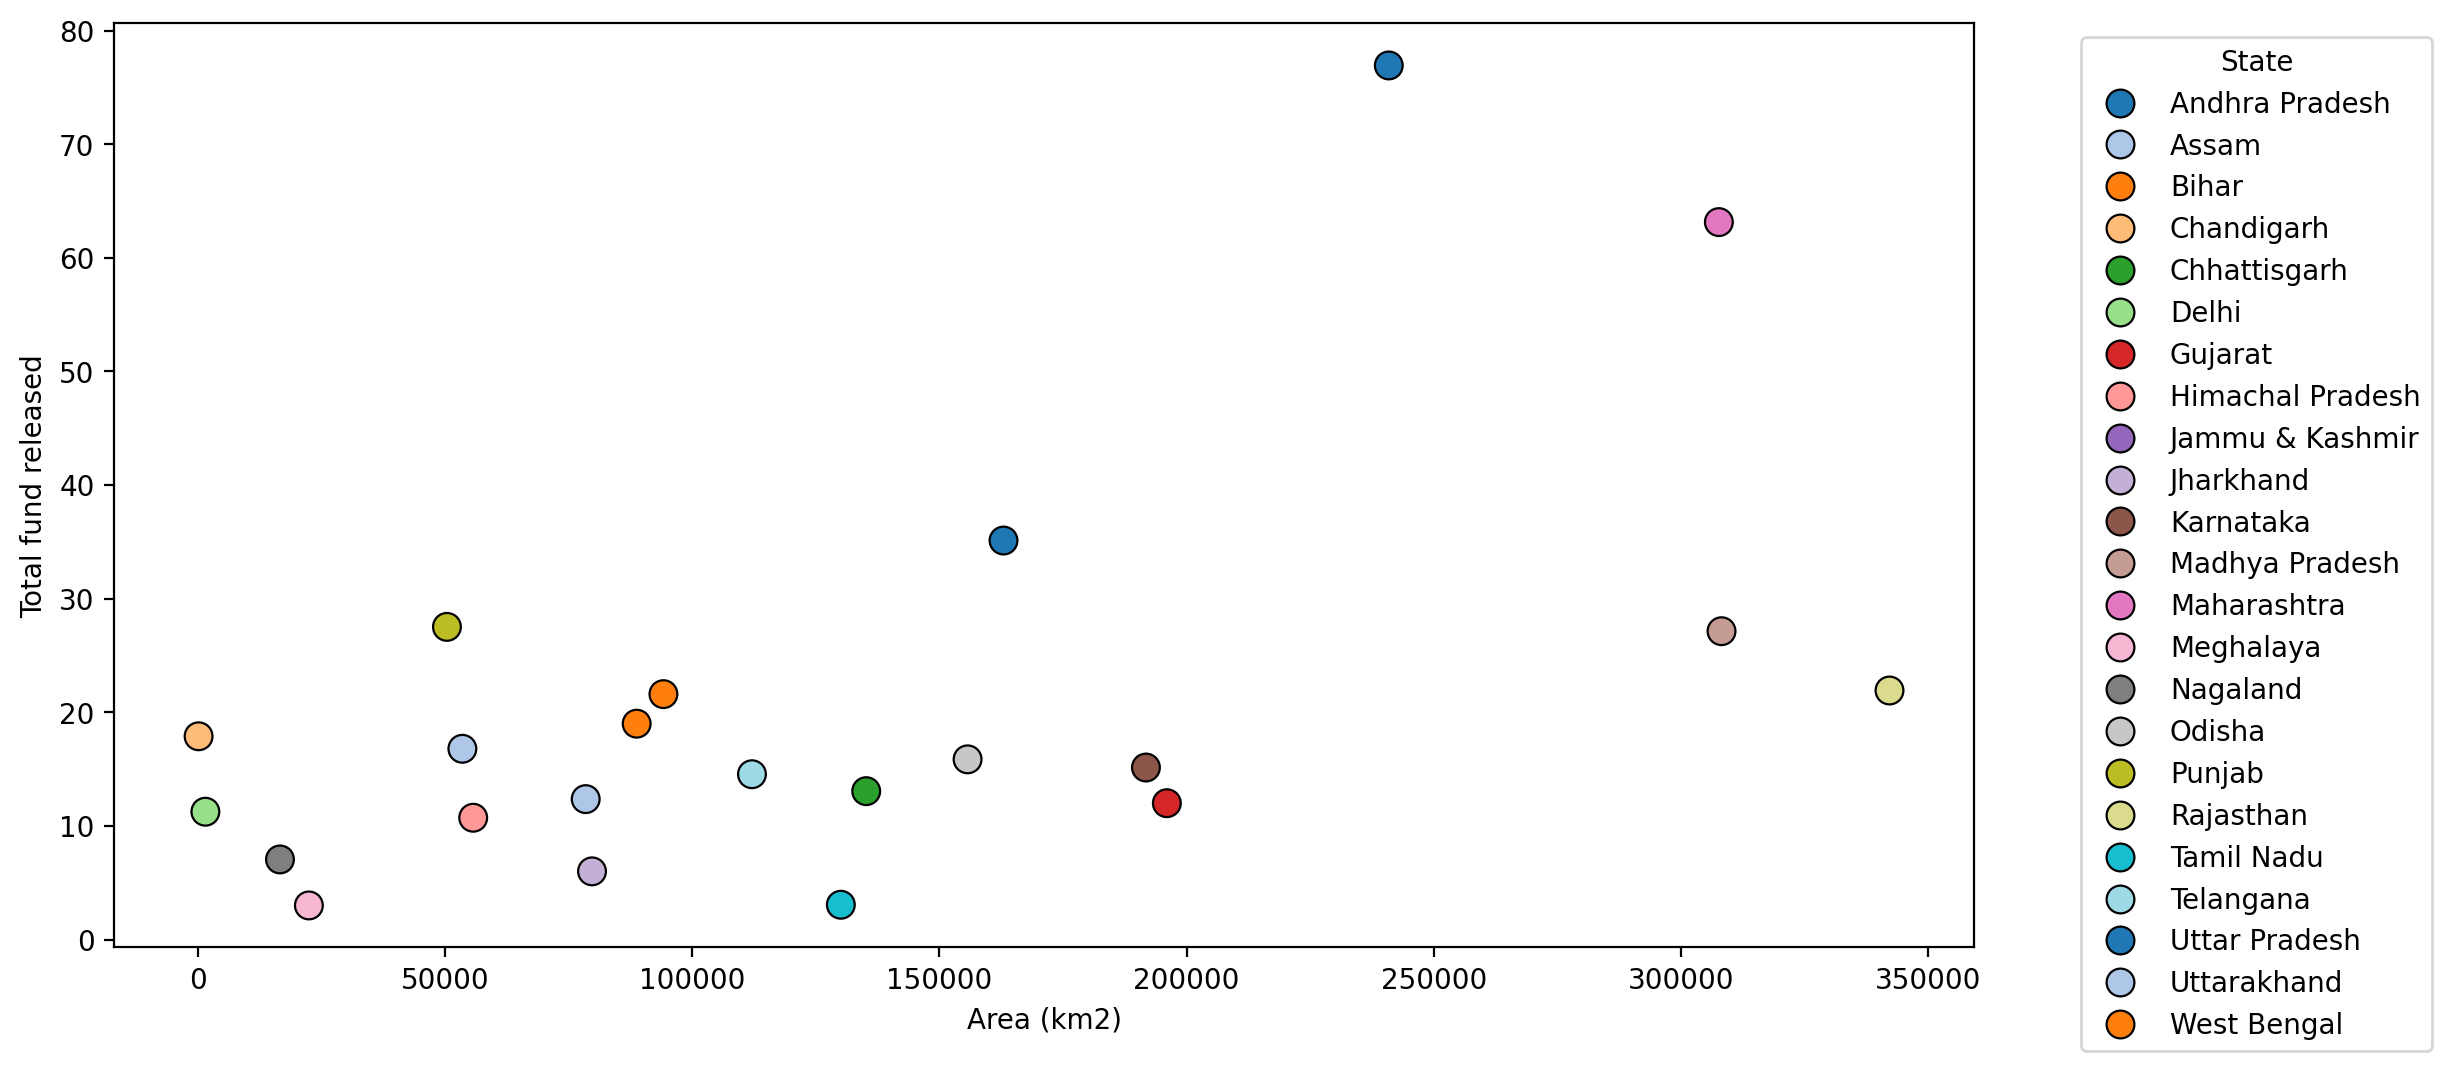

In [37]:
# Q3

for col in ["Total fund released"]:
    ncap_fund[col] = pd.to_numeric(ncap_fund[col], errors="coerce")

state_funding = ncap_fund.groupby("state")["Total fund released"].sum().reset_index()
state_funding = state_funding.merge(state_data, on="state", how="left") 

plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    data=state_funding,
    x="Area (km2)", 
    y="Total fund released", 
    hue="state",  
    palette="tab20",
    s=100,  
    edgecolor="black"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="State")

plt.show()

***Miscellaneous Questions [5 Marks]***
1. For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)[1 Mark]
2. Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?[1.5 Mark]
3. Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023. Use a line graph to compare yearly average PM2.5 trends.[1 Mark]
4. Draw the map of India and plot the sensor locations on the map.[1.5 Mark]


In [38]:
# Q1

most_polluted_city = data[data["Timestamp"].dt.year == 2023].groupby("city")["PM2.5"].mean().idxmax()
new = data[(data["Timestamp"].dt.year == 2023) & (data["city"] == most_polluted_city)]
new["tf"] = new["PM2.5"] > 300
percentage = new["tf"].sum() / new.shape[0] * 100
print(f"The percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³) is\n{percentage}%")

The percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³) is
0.821917808219178%


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11672\1238823661.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new["tf"] = new["PM2.5"] > 300


State with highest NCAP funding in 2020: Andhra Pradesh


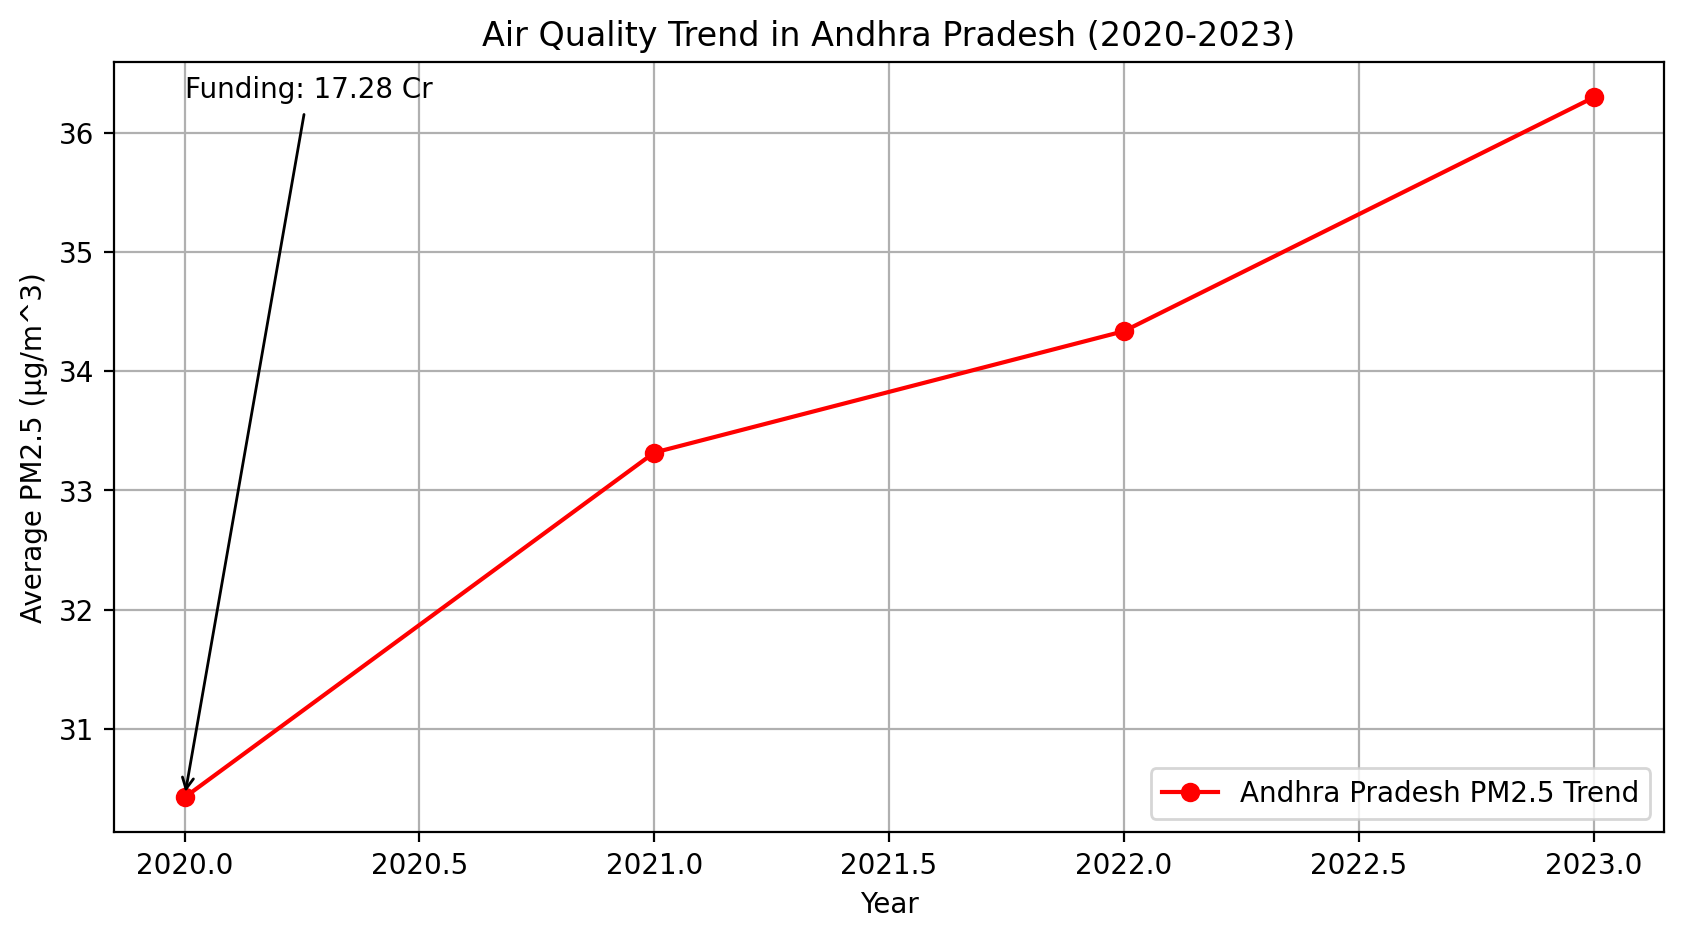

In [42]:
# Q2

highest_funded_state = ncap_fund.groupby("state")["Amount released during FY 2020-21"].sum().idxmax()
print(f"State with highest NCAP funding in 2020: {highest_funded_state}")

state_pm25 = data[data["state"] == highest_funded_state].copy()

state_pm25["Year"] = state_pm25["Timestamp"].dt.year
pm25_trend = state_pm25.groupby("Year")["PM2.5"].mean().reset_index()

pm25_trend = pm25_trend[pm25_trend["Year"].isin([2020, 2021, 2022, 2023])]

plt.figure(figsize=(10, 5))
plt.plot(pm25_trend["Year"], pm25_trend["PM2.5"], marker="o", linestyle="-", color="red", label=f"{highest_funded_state} PM2.5 Trend")

funding_2020 = ncap_fund[ncap_fund["state"] == highest_funded_state]["Amount released during FY 2020-21"].sum()
plt.annotate(f"Funding: {funding_2020} Cr", xy=(2020, pm25_trend[pm25_trend['Year'] == 2020]["PM2.5"].values[0]),
             xytext=(2020, pm25_trend["PM2.5"].max()), arrowprops=dict(facecolor="blue", arrowstyle="->"), fontsize=10)

plt.xlabel("Year")
plt.ylabel("Average PM2.5 (µg/m^3)")
plt.title(f"Air Quality Trend in {highest_funded_state} (2020-2023)")
plt.legend()
plt.grid(True)
plt.show()

The state that received the highest NCAP funding in 2020 is
Andhra Pradesh
From plot we can see that upto 2020 the pollution is decreased but after that it is increased. That means even after getting enough funds


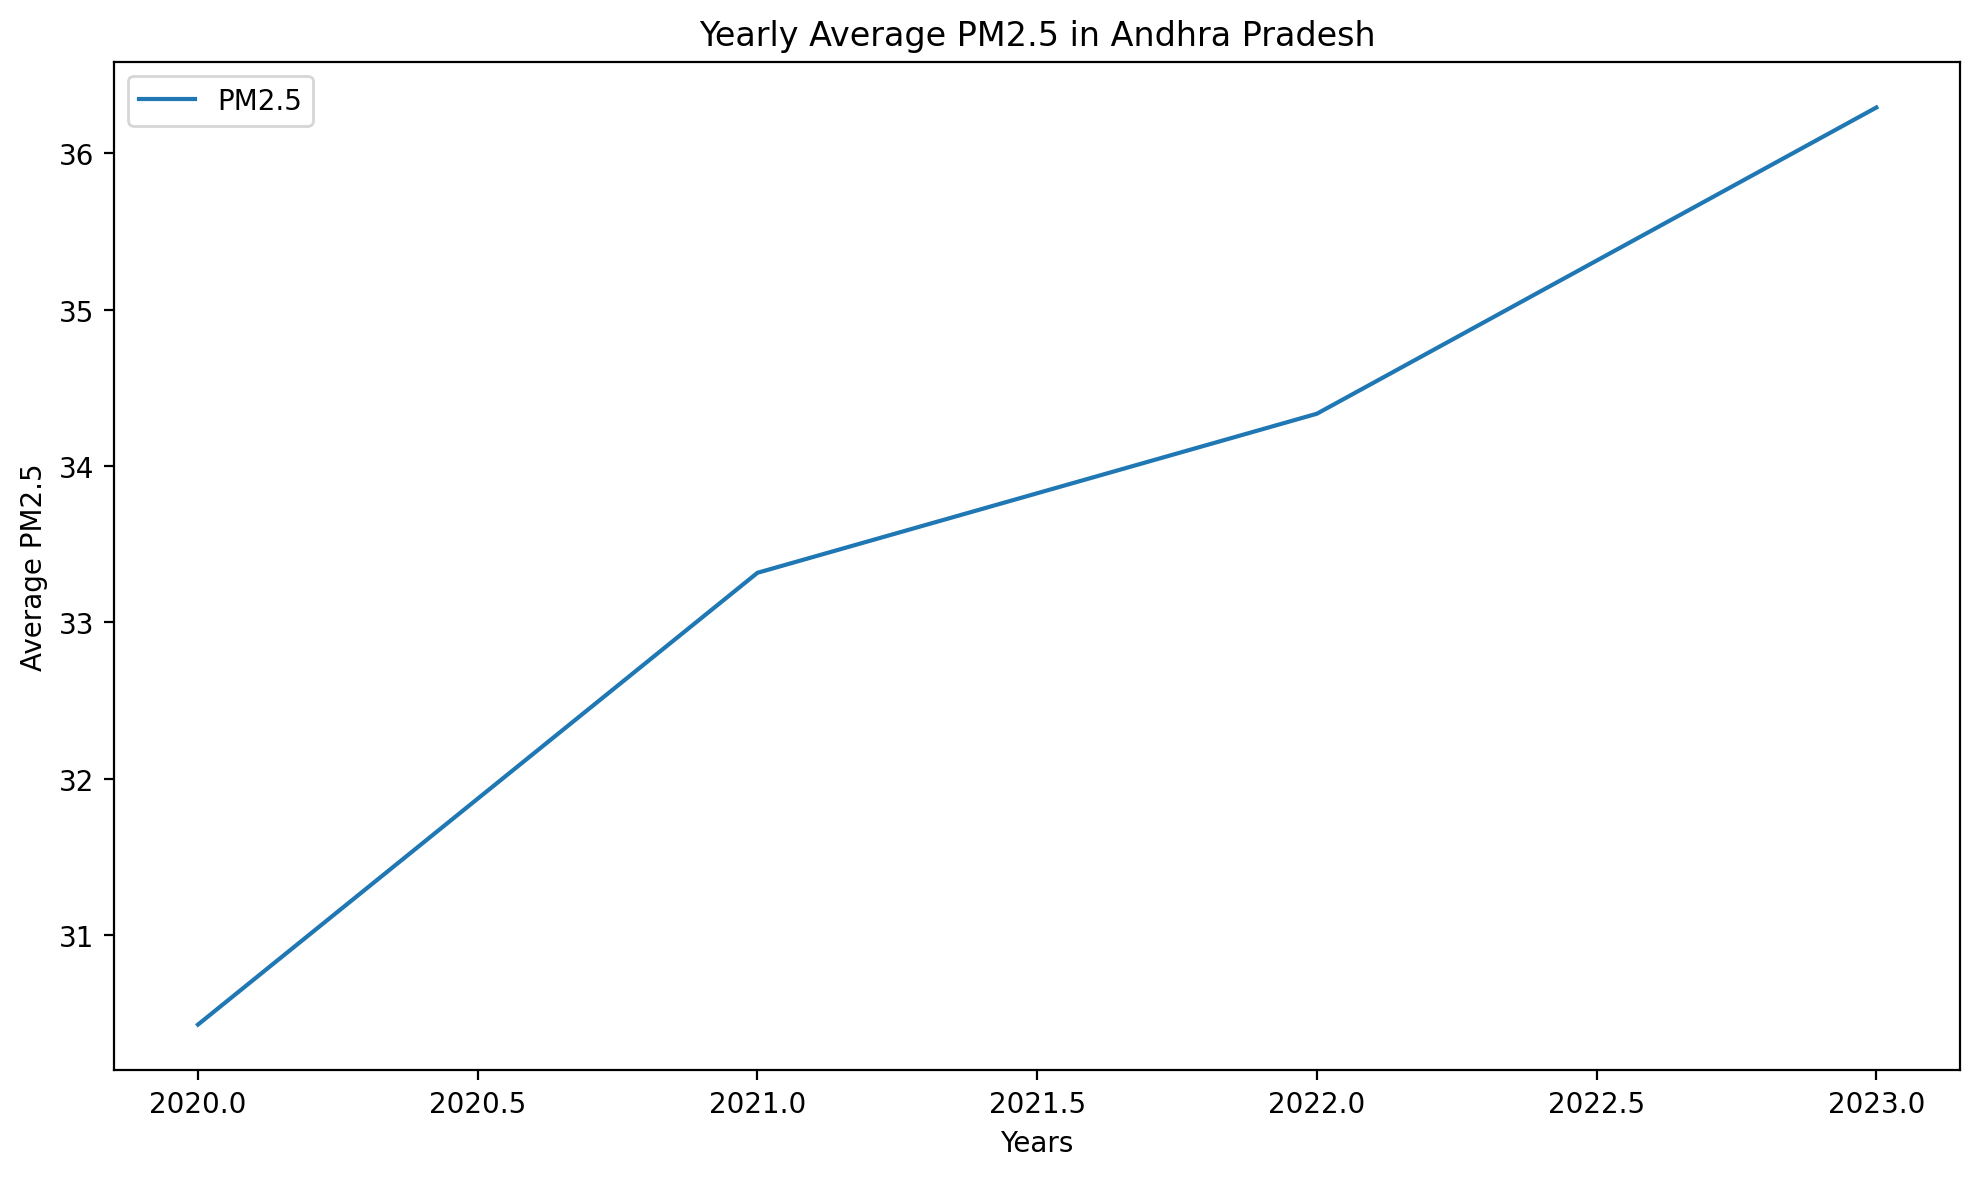

In [28]:
# Q3

state_high_ncap_fund = ncap_fund.groupby("state")["Amount released during FY 2020-21"].sum().idxmax()
print(f"The state that received the highest NCAP funding in 2020 is\n{state_high_ncap_fund}")

years = {}

andhra = data[data["state"] == state_high_ncap_fund]
for yr in range(2020, 2024):
    years[yr] = (andhra[andhra["Timestamp"].dt.year == yr]["PM2.5"].mean())

print("From plot we can see that upto 2020 the pollution is decreased but after that it is increased. That means even after getting enough funds")

plt.figure(figsize = (10,6))
plt.plot(years.keys(), years.values(), label = "PM2.5")
plt.xlabel("Years")
plt.ylabel("Average PM2.5")
plt.title("Yearly Average PM2.5 in Andhra Pradesh")
plt.tight_layout()
plt.legend()

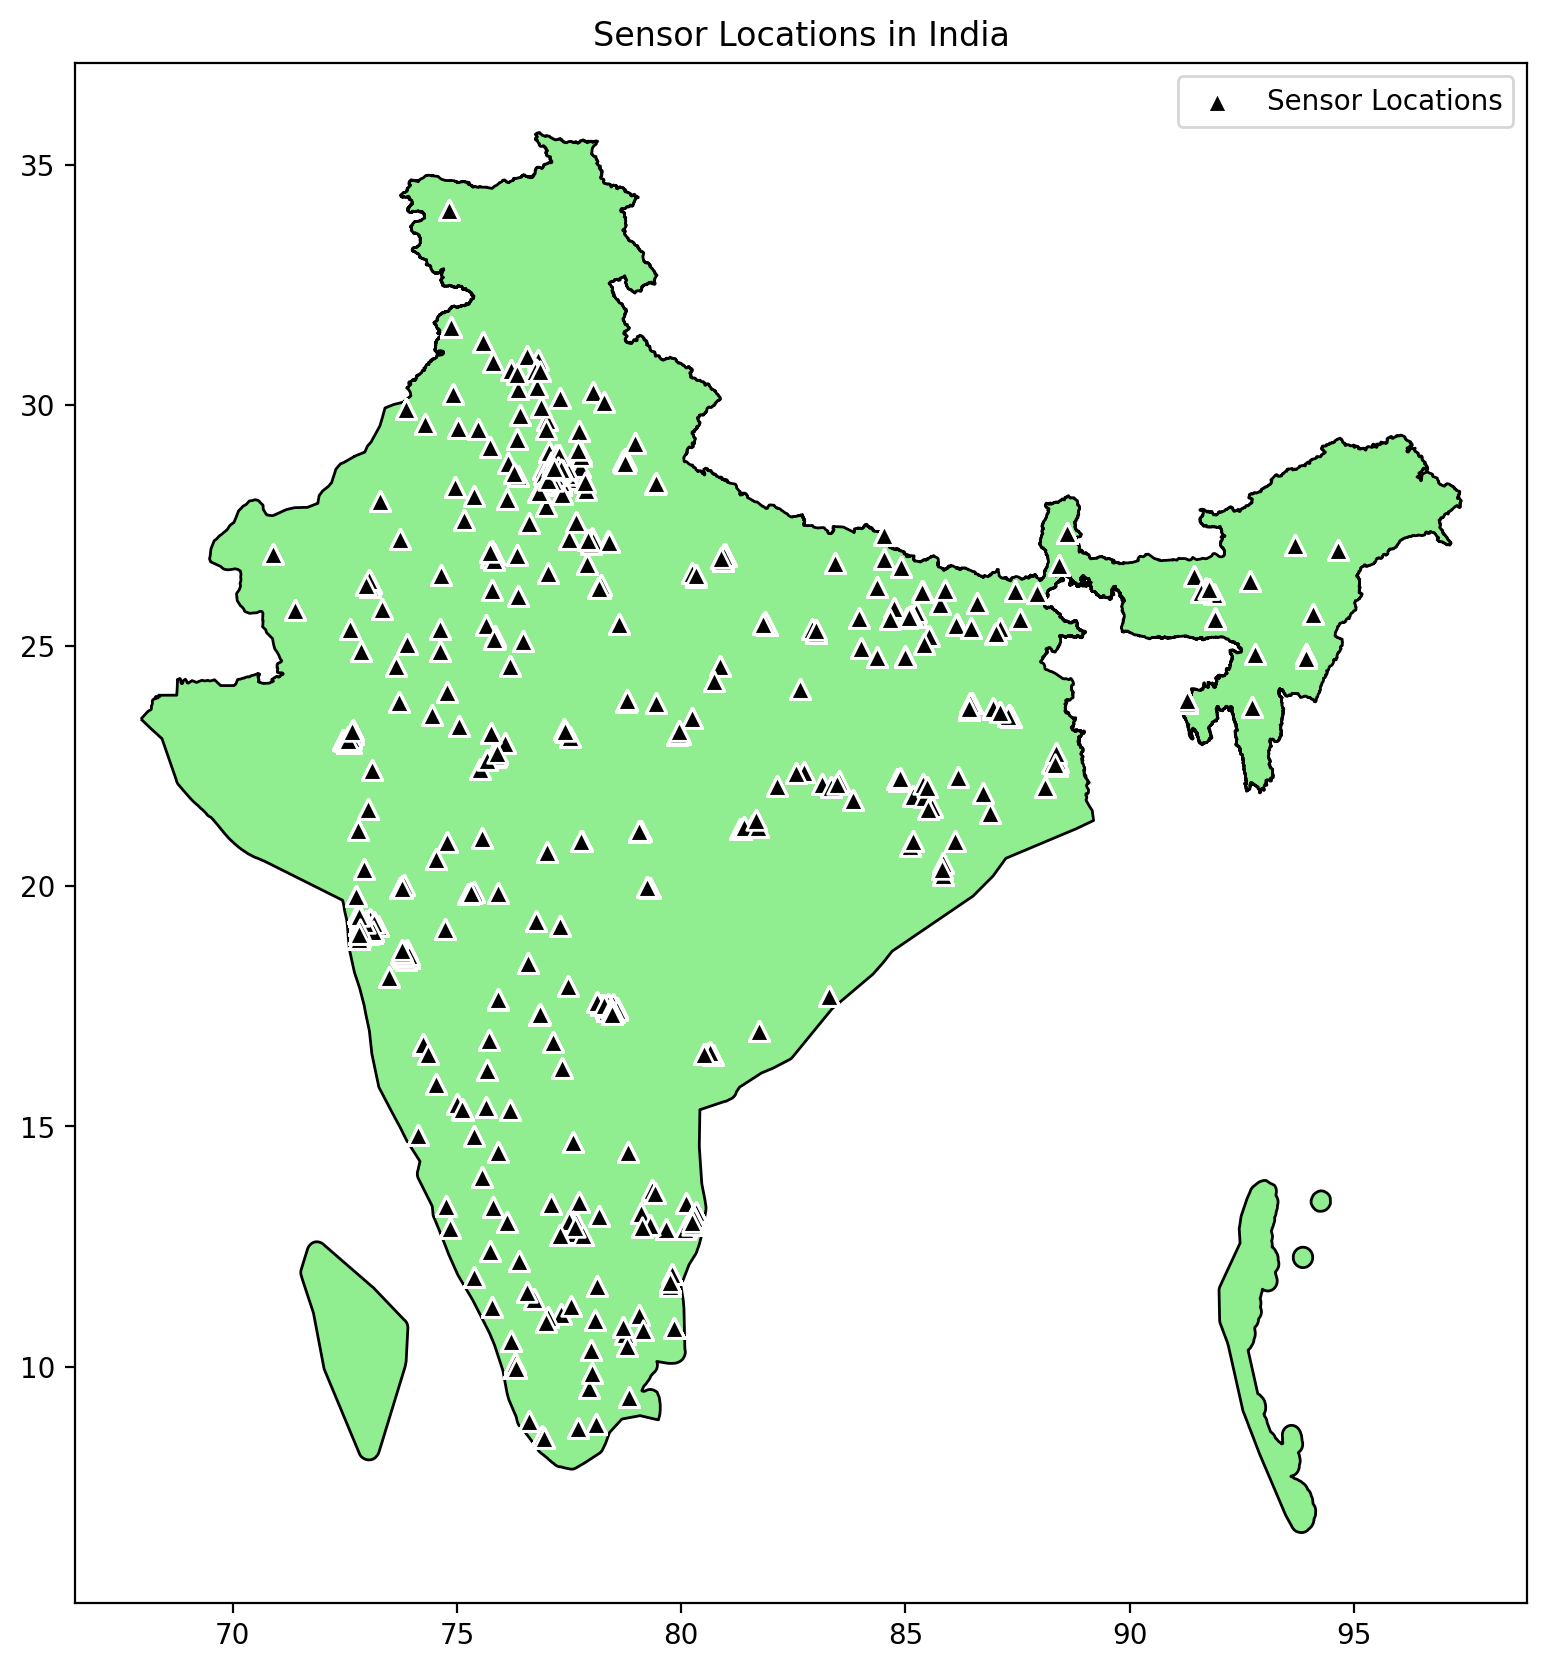

In [43]:
# Q4

india_boundary=ox.geocode_to_gdf("India")
sensor_locations=data[['latitude', 'longitude', 'station']].dropna()

fig, ax=plt.subplots(figsize=(10, 10))
india_boundary.plot(ax=ax, color='lightgreen', edgecolor='black')
ax.scatter(sensor_locations['longitude'], sensor_locations['latitude'], color='black', marker='^', s=50, edgecolors='white', label='Sensor Locations')
ax.set_title('Sensor Locations in India', fontsize=12)
ax.legend(loc='upper right')
plt.show()

***Tell us something new [1 Mark]***
1. Tell us something interesting from the dataset that we have not asked. Anything that intrigues you, anything that might be useful to the policymakers. 


In [64]:
print("Highly polluted states like Uttar Pradesh and Bihar have fewer air quality monitoring stations relative to their area and population, while smaller regions like Delhi have better coverage. This disparity limits accurate pollution tracking and policy effectiveness. Expanding monitoring infrastructure, especially near industrial zones and rural areas, can help identify hidden pollution hotspots. Additionally, integrating real-time air quality data with public health initiatives can improve interventions. Policymakers should prioritize increasing monitoring density in underrepresented regions to ensure equitable pollution tracking and more effective air quality management across India.")

Highly polluted states like Uttar Pradesh and Bihar have fewer air quality monitoring stations relative to their area and population, while smaller regions like Delhi have better coverage. This disparity limits accurate pollution tracking and policy effectiveness. Expanding monitoring infrastructure, especially near industrial zones and rural areas, can help identify hidden pollution hotspots. Additionally, integrating real-time air quality data with public health initiatives can improve interventions. Policymakers should prioritize increasing monitoring density in underrepresented regions to ensure equitable pollution tracking and more effective air quality management across India.
